In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Прочитайте данные (переменную назовите 'df')
df = pd.read_csv('data_project.csv')

# Вывести несколько первых строк таблицы данных
print(df.head())

         Дата  Склад Контрагент Номенклатура  Количество
0  2018-01-04      1  address_0    product_0           4
1  2018-01-04      1  address_0    product_1           4
2  2018-01-04      1  address_0    product_2           5
3  2018-01-04      1  address_0    product_3          10
4  2018-01-04      1  address_0    product_4           2


Проверяем формат столбцов

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301355 entries, 0 to 301354
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   Дата          301355 non-null  object
 1   Склад         301355 non-null  int64 
 2   Контрагент    301355 non-null  object
 3   Номенклатура  301355 non-null  object
 4   Количество    301355 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.5+ MB


Сразу переведем столбец "Дата" в правильный формат

In [5]:
df['Дата'] = pd.to_datetime(df['Дата'], dayfirst=True, errors='coerce')
print(df['Дата'].dtype)

datetime64[ns]


Сгруппируйте данные по дате, посчитайте количество продаж

In [6]:
grouped_df = df.groupby('Дата')['Количество'].sum()

Вывести несколько первых строк сгруппированных данных

In [7]:
grouped_df.head()

Дата
2018-01-02    3770
2018-01-03    3848
2018-01-04    3786
2018-01-05    4221
2018-01-06    4736
Name: Количество, dtype: int64

Нарисуйте график продаж у `grouped_df`

In [8]:
grouped_df = grouped_df.reset_index()

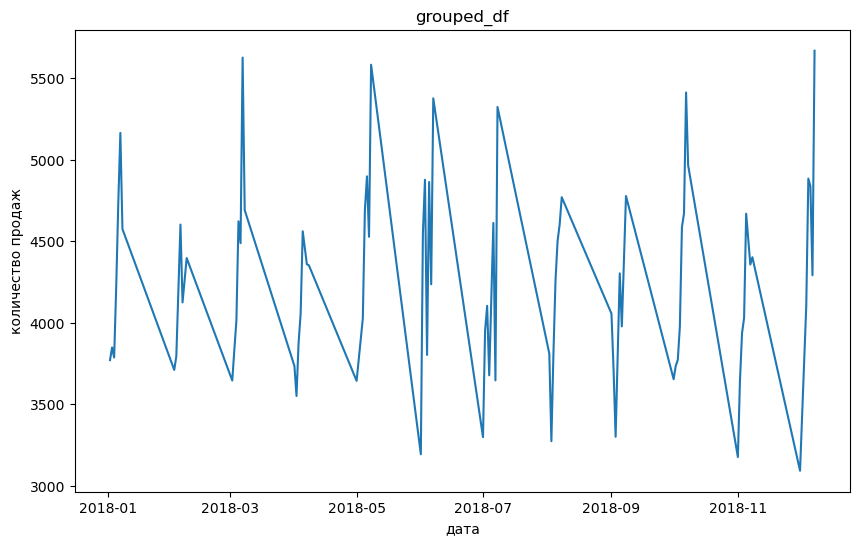

In [21]:
plt.figure(figsize=(10, 6))
plt.plot(grouped_df['Дата'], grouped_df['Количество'])
plt.xlabel('дата')
plt.ylabel('количество продаж')
plt.title('grouped_df')
plt.show()

Опишите что вы видите на графике. Ваша задача - максимально описать график

Найдите строку, у которой максимальный выброс по количеству продаж (нужно найти выброс у `df`)

In [22]:
grouped_df['Количество'].max()

5667

Найдите топовый товар по продажам по средам за июнь, июль, август у 3 склада

In [27]:
top_pr = (
    df[
        (df['Дата'].dt.month.isin([6, 7, 8])) &   
        (df['Дата'].dt.dayofweek == 2) &          
        (df['Склад'] == 3)                       
    ]
    .groupby('Номенклатура', as_index = False)['Количество']  
    .sum()
    .sort_values(by ='Количество', ascending = False)           
    .iloc[0]                                                
)

print(top_pr)

Номенклатура    product_1
Количество            479
Name: 1, dtype: object


### Скачайте данные по погоде с https://rp5.ru/Архив_погоды_в_Астане (скачайте исходные данные, и далее преобразуйте так, чтобы мы имели Дату и Среднюю температуру за день), объедините таблицу температуры с `grouped_df`, и нарисуйте график `y=['Количество продаж', 'T']`, где Т это температура. А также отдельно график температуры.

In [13]:
weather = pd.read_excel('weather_2018.xlsx')
weather

,Местное время в Астане,T
0,08.12.2018 23:00,-19.4
1,08.12.2018 20:00,-19.2
2,08.12.2018 17:00,-16.8
3,08.12.2018 14:00,-7.1
4,08.12.2018 11:00,-13.5
...,...,...
2721,02.01.2018 14:00,-6.3
2722,02.01.2018 11:00,-8.6
2723,02.01.2018 08:00,-11.3
2724,02.01.2018 05:00,-11.5


In [14]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2726 entries, 0 to 2725
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Местное время в Астане  2726 non-null   object 
 1   T                       2726 non-null   float64
dtypes: float64(1), object(1)
memory usage: 42.7+ KB


In [15]:
weather['datetime'] = pd.to_datetime(weather['Местное время в Астане'],dayfirst=True, errors='coerce')

In [16]:
weather['date'] = weather['datetime'].dt.date

In [17]:
daily_avg = weather.groupby('date')['T'].mean().reset_index()

In [18]:
daily_avg.columns = ['Дата', 'Средняя температура']

print(daily_avg)

           Дата  Средняя температура
0    2018-01-02              -9.5125
1    2018-01-03             -11.4625
2    2018-01-04             -14.0750
3    2018-01-05             -16.8625
4    2018-01-06             -13.3000
..          ...                  ...
336  2018-12-04              -8.7375
337  2018-12-05             -10.7250
338  2018-12-06             -13.2750
339  2018-12-07             -14.9750
340  2018-12-08             -16.8250

[341 rows x 2 columns]


In [19]:
daily_avg['Дата'] = pd.to_datetime(daily_avg['Дата'], dayfirst=True, errors='coerce')
print(daily_avg['Дата'].dtype)

datetime64[ns]


In [20]:
df_new = pd.merge(grouped_df, daily_avg, on='Дата', how='left')
df_new

,Дата,Количество,Средняя температура
0,2018-01-02,3770,-9.5125
1,2018-01-03,3848,-11.4625
2,2018-01-04,3786,-14.0750
3,2018-01-05,4221,-16.8625
4,2018-01-06,4736,-13.3000
...,...,...,...
75,2018-12-04,4103,-8.7375
76,2018-12-05,4883,-10.7250
77,2018-12-06,4837,-13.2750
78,2018-12-07,4290,-14.9750


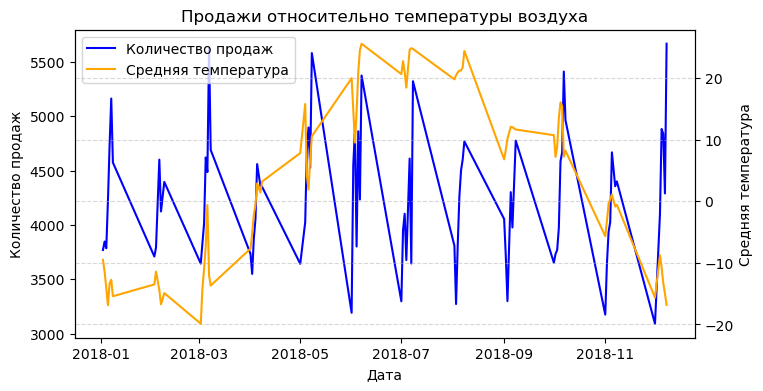

In [28]:
fig, ax1 = plt.subplots(figsize=(8, 4))

ax1.plot(df_new['Дата'], df_new['Количество'], color='blue', label='Количество продаж')
ax1.set_xlabel('Дата')
ax1.set_ylabel('Количество продаж')
ax1.tick_params(axis='y')

ax2 = ax1.twinx()
ax2.plot(df_new['Дата'], df_new['Средняя температура'], color='orange', label='Средняя температура')
ax2.set_ylabel('Средняя температура')
ax2.tick_params(axis='y')

plt.title('Продажи относительно температуры воздуха') 
plt.grid(True, which='major', linestyle='--', alpha=0.5)
plt.xticks(rotation=45)

lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left')

plt.show()

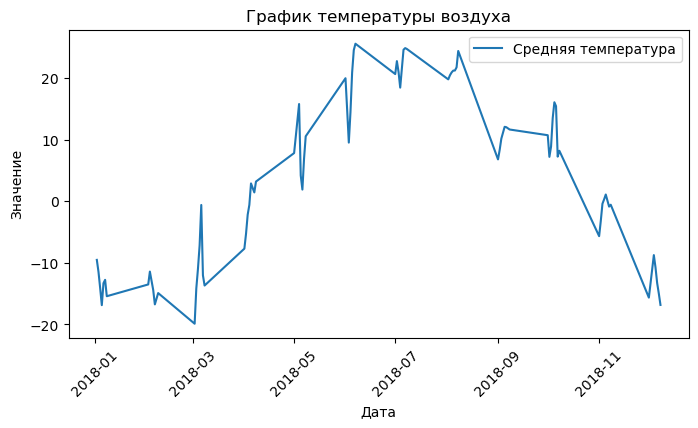

In [30]:
plt.figure(figsize=(8, 4))
plt.plot(df_new['Дата'], df_new['Средняя температура'], label='Средняя температура')
plt.xlabel('Дата')
plt.ylabel('Значение')
plt.title('График температуры воздуха')
plt.legend()
plt.xticks(rotation=45)  
plt.show()

In [9]:
grouped_df.describe()


,Дата,Количество
count,80,80.000000
mean,2018-06-22 09:18:00,4249.775000
min,2018-01-02 00:00:00,3092.000000
25%,2018-04-01 18:00:00,3791.250000
50%,2018-07-01 12:00:00,4228.000000
75%,2018-10-01 06:00:00,4632.750000
max,2018-12-08 00:00:00,5667.000000
std,NaN,596.666074
